### Multi-Arm Bandit
---
**Upper-Confidence-Bound**
<img style="float:left" src="UCB1.png" alt="drawing" width="300"/>

where ln t denotes the natural logarithm of t (the number that e = 2.71828 would have to be raised to in order to equal t), Nt(a) denotes the number of times that action a has been selected prior to time t (the denominator in (2.1)), and the number c > 0 controls the degree of exploration. If Nt(a) = 0, then a is considered to be a maximizing action.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [33]:
class Bandit:
    def __init__(self, k=10, exp_rate=.3, lr=0.1, ucb=False, seed=None, c=2):
        self.k = k
        self.actions = range(self.k)
        self.exp_rate = exp_rate
        self.lr = lr
        self.total_reward = 0
        self.avg_reward = []
        
        self.TrueValue = []
        np.random.seed(seed)
        for i in range(self.k):
            self.TrueValue.append(np.random.randn()+2)  # normal distribution
        
        self.values = np.zeros(self.k)
        self.times = 0
        self.action_times = np.zeros(self.k)
        
        self.ucb = ucb  # if select action using upper-confidence-bound
        self.c = c
    
    def chooseAction(self):
        # explore
        if np.random.uniform(0, 1) <= self.exp_rate:
            action = np.random.choice(self.actions)
        else:
            # exploit
            if self.ucb:
                if self.times == 0:
                    action = np.random.choice(self.actions)
                else:
                    confidence_bound = self.values + self.c*np.sqrt(np.log(self.times)/(self.action_times+0.1))  # c=2
                    action = np.argmax(confidence_bound)
            else:
                action = np.argmax(self.values)
        return action
    
    def takeAction(self, action):
        self.times += 1
        self.action_times[action] += 1
        # take action and update value estimates
        # reward = self.TrueValue[action]
        reward = np.random.randn() + self.TrueValue[action]  # add randomness to reward
        # using incremental method to propagate
        self.values[action] += self.lr * (reward - self.values[action])  # look like fixed lr converges better
        
        self.total_reward += reward
        self.avg_reward.append(self.total_reward/self.times)
        
    def play(self, n):
        for _ in range(n):
            action = self.chooseAction()
            self.takeAction(action)

In [3]:
bdt = Bandit(k=5)
bdt.play(2000)

In [4]:
print("Estimated values", bdt.values)
print("Actual values", bdt.TrueValue)

Estimated values [1.95078823 2.93191293 2.95000147 3.21983424 1.59877787]
Actual values [1.5082568528726594, 3.037948384176066, 2.990357118258633, 2.990494170861293, 1.5602678232164846]


Text(0,0.5,'avg reward')

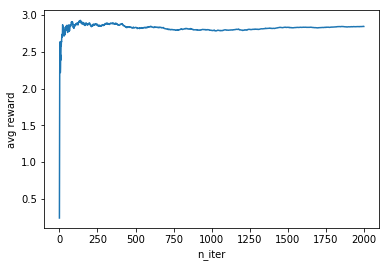

In [6]:
plt.plot(bdt.avg_reward)
plt.xlabel("n_iter")
plt.ylabel("avg reward")

#### Epsilon-Greedy with different exploration rate

In [24]:
bdt = Bandit(k=5, exp_rate=0.1, seed=1234)
bdt.play(2000)

print("Estimated values", bdt.values)
print("Actual values", bdt.TrueValue)

avg_reward1 = bdt.avg_reward

Estimated values [2.6600613  0.65143855 3.80596176 2.25201666 1.16469527]
Actual values [2.471435163732493, 0.8090243052935355, 3.432706968426097, 1.6873481039082872, 1.2794112666349884]


In [25]:
bdt = Bandit(k=5, exp_rate=0.3, seed=1234)
bdt.play(2000)

print("Estimated values", bdt.values)
print("Actual values", bdt.TrueValue)

avg_reward2 = bdt.avg_reward

Estimated values [2.54927187 0.84413741 3.34851036 1.89580542 1.56265398]
Actual values [2.471435163732493, 0.8090243052935355, 3.432706968426097, 1.6873481039082872, 1.2794112666349884]


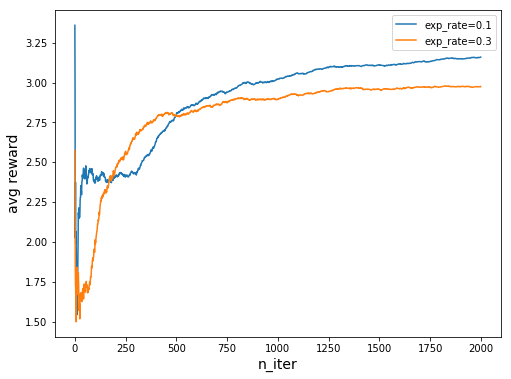

In [46]:
plt.figure(figsize=[8, 6])
plt.plot(avg_reward1, label="exp_rate=0.1")
plt.plot(avg_reward2, label="exp_rate=0.3")

plt.xlabel("n_iter", fontsize=14)
plt.ylabel("avg reward", fontsize=14)
plt.legend()

#### UCB

In [34]:
bdt = Bandit(k=5, exp_rate=0.1, seed=1234, ucb=True, c=2)
bdt.play(2000)

print("Estimated values", bdt.values)
print("Actual values", bdt.TrueValue)

avg_reward3 = bdt.avg_reward

Estimated values [2.55646074 0.65063447 3.80596236 2.20346295 1.16551876]
Actual values [2.471435163732493, 0.8090243052935355, 3.432706968426097, 1.6873481039082872, 1.2794112666349884]


In [38]:
bdt = Bandit(k=5, exp_rate=0.1, seed=1234, ucb=True, c=5)
bdt.play(2000)

print("Estimated values", bdt.values)
print("Actual values", bdt.TrueValue)

avg_reward4 = bdt.avg_reward

Estimated values [2.36562833 0.65999917 3.80596156 2.06576659 1.14479614]
Actual values [2.471435163732493, 0.8090243052935355, 3.432706968426097, 1.6873481039082872, 1.2794112666349884]


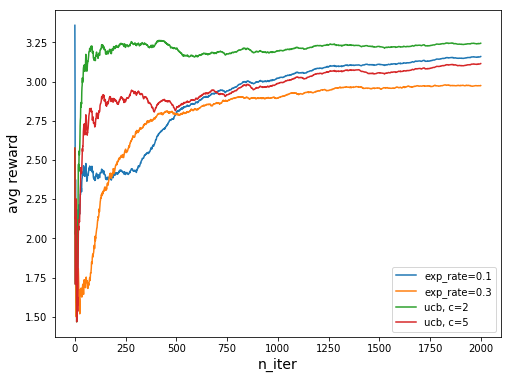

In [45]:
plt.figure(figsize=[8, 6])
plt.plot(avg_reward1, label="exp_rate=0.1")
plt.plot(avg_reward2, label="exp_rate=0.3")
plt.plot(avg_reward3, label="ucb, c=2")
plt.plot(avg_reward4, label="ucb, c=5")

plt.xlabel("n_iter", fontsize=14)
plt.ylabel("avg reward", fontsize=14)
plt.legend()